In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("D:\\DATASETS\\GOAT.xlsx",parse_dates=['date'])

In [3]:
df.head()

,district,date,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_max,wind_speed_min
0,Adilabad,2018-01-01,0.0,10.4,29.7,41.8,83.8,0.0,5.7
1,Adilabad,2018-01-02,0.0,11.2,34.8,29.8,74.6,0.0,4.8
2,Adilabad,2018-01-03,0.0,17.3,38.0,31.8,71.5,0.0,3.4
3,Adilabad,2018-01-04,0.0,27.3,41.0,24.9,75.6,0.0,7.7
4,Adilabad,2018-01-05,0.0,28.7,43.2,27.7,48.9,0.0,13.5


In [4]:
df=df.resample('M',on='date').mean()

In [5]:
df.head()

,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_max,wind_speed_min
date,,,,,,,
2018-01-31,1.151613,15.241935,33.187097,40.567742,79.909677,0.051613,6.896774
2018-02-28,1.350000,19.053571,34.964286,43.907143,80.328571,0.007143,6.846429
2018-03-31,0.370968,21.493548,36.445161,39.716129,72.570968,0.003226,6.293548
2018-04-30,0.093333,24.910000,38.920000,37.963333,68.506667,0.030000,8.373333
2018-05-31,1.532258,26.441935,40.070968,39.064516,71.164516,0.296774,9.967742


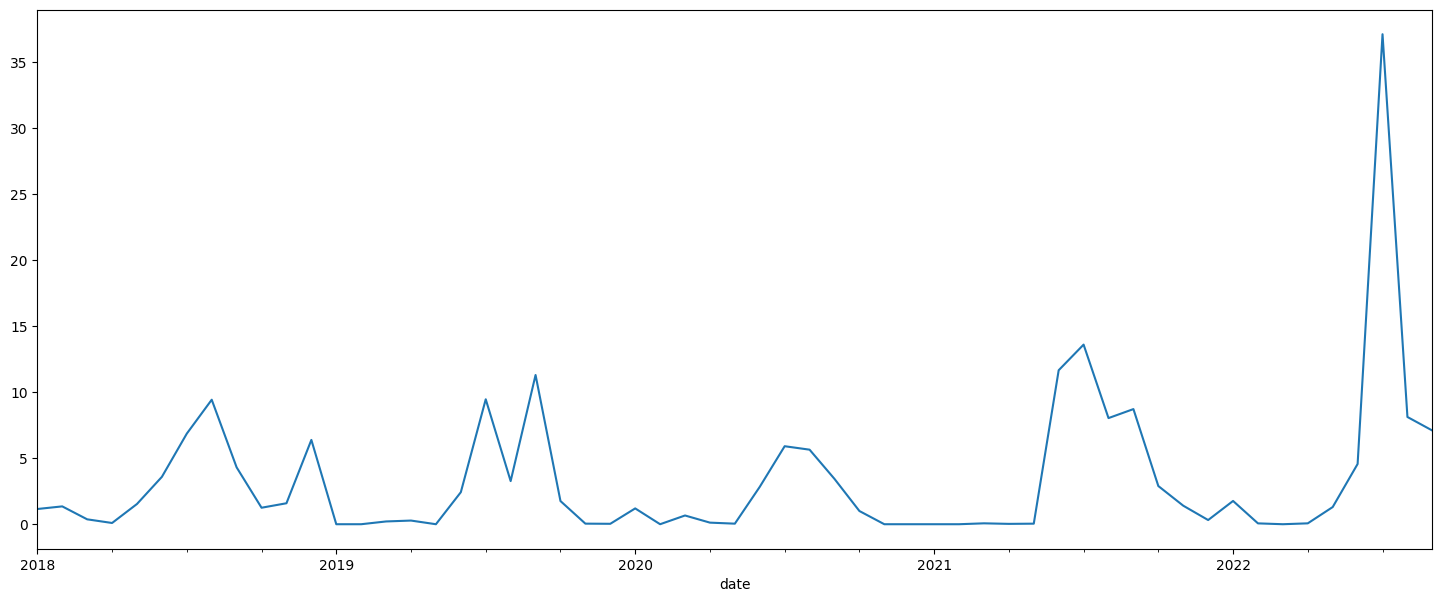

In [6]:
df['rain'].plot(figsize=(18,7))
plt.show()

In [7]:
adfuller(df['rain'])

(-0.2606871468749577,
 0.9308906078216435,
 11,
 45,
 {'1%': -3.584828853223594,
  '5%': -2.9282991495198907,
  '10%': -2.6023438271604937},
 288.84250825674627)

In [8]:
df_diff=df['rain'].diff(1).dropna()

In [9]:
adfuller(df_diff)

(-6.412836870173731,
 1.872344698293803e-08,
 11,
 44,
 {'1%': -3.5885733964124715,
  '5%': -2.929885661157025,
  '10%': -2.6031845661157025},
 276.41256706048074)

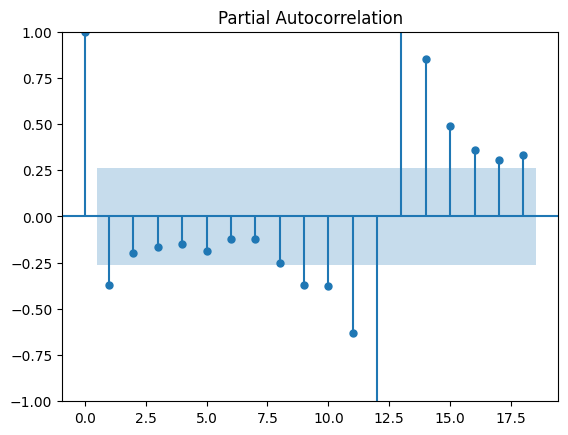

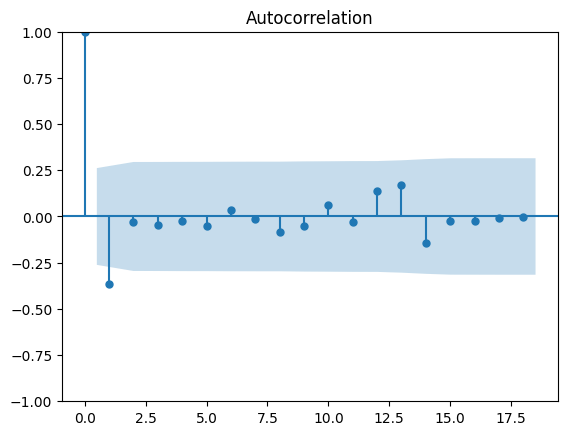

In [10]:
plot_pacf(df_diff)
plot_acf(df_diff)
plt.show()

In [11]:
p = range(0, 3)
d = range(1,2)
q = range(0, 5)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_diff,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            )
            results = mod.fit(method = 'powell')
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Optimization terminated successfully.
         Current function value: 3.063862
         Iterations: 2
         Function evaluations: 33
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:345.1525517505292
Optimization terminated successfully.
         Current function value: 3.030771
         Iterations: 3
         Function evaluations: 73
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:343.4463857952667
Optimization terminated successfully.
         Current function value: 3.022610
         Iterations: 3
         Function evaluations: 96
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:344.53233459651426
Optimization terminated successfully.
         Current function value: 3.009004
         Iterations: 3
         Function evaluations: 131
ARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:345.0084734124378
Optimization terminated successfully.
         Current function value: 3.007835
         Iterations: 3
         Function evaluations: 158
ARIMA(0, 1, 0)x(0, 1, 4, 12)12 - AIC:346.8774965405372
Optimization terminated successfully.

Optimization terminated successfully.
         Current function value: 2.372934
         Iterations: 3
         Function evaluations: 257
ARIMA(0, 1, 2)x(2, 1, 3, 12)12 - AIC:281.7685750871611
Optimization terminated successfully.
         Current function value: 2.372940
         Iterations: 3
         Function evaluations: 291
ARIMA(0, 1, 2)x(2, 1, 4, 12)12 - AIC:283.7693050985199
Optimization terminated successfully.
         Current function value: 2.366042
         Iterations: 3
         Function evaluations: 186
ARIMA(0, 1, 3)x(0, 1, 0, 12)12 - AIC:272.99672909831713
Optimization terminated successfully.
         Current function value: 2.364793
         Iterations: 4
         Function evaluations: 264
ARIMA(0, 1, 3)x(0, 1, 1, 12)12 - AIC:274.85680482114697
Optimization terminated successfully.
         Current function value: 2.364648
         Iterations: 4
         Function evaluations: 303
ARIMA(0, 1, 3)x(0, 1, 2, 12)12 - AIC:276.8405571621323
Optimization terminated successfu

Optimization terminated successfully.
         Current function value: 2.721580
         Iterations: 2
         Function evaluations: 111
ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:314.81691098108115
Optimization terminated successfully.
         Current function value: 2.720422
         Iterations: 4
         Function evaluations: 259
ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:316.6872495471815
Optimization terminated successfully.
         Current function value: 2.719900
         Iterations: 2
         Function evaluations: 155
ARIMA(1, 1, 0)x(2, 1, 3, 12)12 - AIC:318.62883938655466
Optimization terminated successfully.
         Current function value: 2.719896
         Iterations: 2
         Function evaluations: 173
ARIMA(1, 1, 0)x(2, 1, 4, 12)12 - AIC:320.62831326601713
Optimization terminated successfully.
         Current function value: 2.489790
         Iterations: 3
         Function evaluations: 117
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:284.85646306386747
Optimization terminated success

ARIMA(1, 1, 3)x(1, 1, 3, 12)12 - AIC:283.1753377586076
Optimization terminated successfully.
         Current function value: 2.367623
         Iterations: 4
         Function evaluations: 430
ARIMA(1, 1, 3)x(1, 1, 4, 12)12 - AIC:285.17380267997993
Optimization terminated successfully.
         Current function value: 2.367889
         Iterations: 4
         Function evaluations: 306
ARIMA(1, 1, 3)x(2, 1, 0, 12)12 - AIC:279.20360627081374
Optimization terminated successfully.
         Current function value: 2.367889
         Iterations: 4
         Function evaluations: 348
ARIMA(1, 1, 3)x(2, 1, 1, 12)12 - AIC:281.20353338572113
Optimization terminated successfully.
         Current function value: 2.367865
         Iterations: 4
         Function evaluations: 385
ARIMA(1, 1, 3)x(2, 1, 2, 12)12 - AIC:283.2008578117465
Optimization terminated successfully.
         Current function value: 2.367637
         Iterations: 4
         Function evaluations: 440
ARIMA(1, 1, 3)x(2, 1, 3, 12)12 -

Optimization terminated successfully.
         Current function value: 2.406275
         Iterations: 3
         Function evaluations: 237
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:283.5027872265846
Optimization terminated successfully.
         Current function value: 2.405712
         Iterations: 3
         Function evaluations: 267
ARIMA(2, 1, 1)x(1, 1, 3, 12)12 - AIC:285.43968997214813
Optimization terminated successfully.
         Current function value: 2.405706
         Iterations: 3
         Function evaluations: 299
ARIMA(2, 1, 1)x(1, 1, 4, 12)12 - AIC:287.43911048119463
Optimization terminated successfully.
         Current function value: 2.406278
         Iterations: 3
         Function evaluations: 207
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:281.5031231166369
Optimization terminated successfully.
         Current function value: 2.406278
         Iterations: 3
         Function evaluations: 238
ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:283.50312757223384
Optimization terminated successf

ARIMA(2, 1, 4)x(0, 1, 4, 12)12 - AIC:282.1894507745309
Optimization terminated successfully.
         Current function value: 2.331362
         Iterations: 16
         Function evaluations: 1417
ARIMA(2, 1, 4)x(1, 1, 0, 12)12 - AIC:277.11253449620057
Optimization terminated successfully.
         Current function value: 2.361634
         Iterations: 7
         Function evaluations: 714
ARIMA(2, 1, 4)x(1, 1, 1, 12)12 - AIC:282.5029913595383
Optimization terminated successfully.
         Current function value: 2.361243
         Iterations: 7
         Function evaluations: 778
ARIMA(2, 1, 4)x(1, 1, 2, 12)12 - AIC:284.4592628210487
Optimization terminated successfully.
         Current function value: 2.330195
         Iterations: 12
         Function evaluations: 1487
ARIMA(2, 1, 4)x(1, 1, 3, 12)12 - AIC:282.9818421595052
Optimization terminated successfully.
         Current function value: 2.322701
         Iterations: 17
         Function evaluations: 2461
ARIMA(2, 1, 4)x(1, 1, 4, 12)

In [17]:
df_diff2=df['rain'].diff(12)

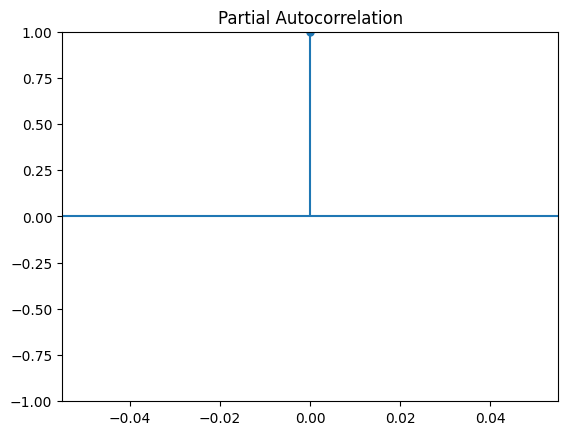

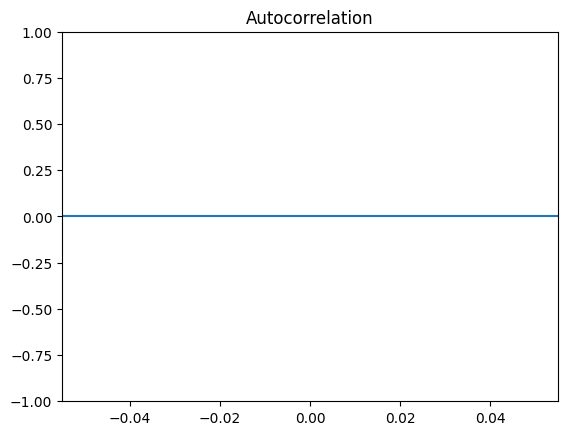

In [18]:
plot_pacf(df_diff2)
plot_acf(df_diff2)
plt.show()

In [12]:
train=df[:len(df)*80//100]
test=df[len(df)*80//100:]

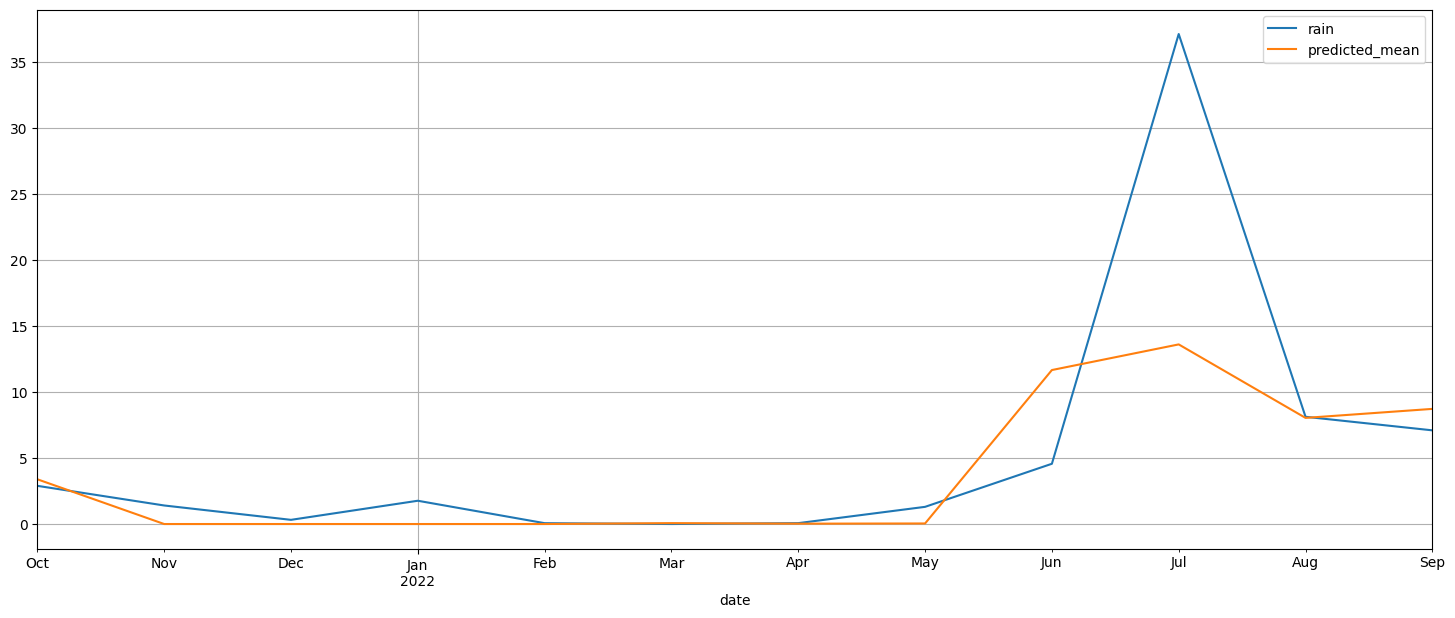

In [28]:
model=sm.tsa.statespace.SARIMAX(train['rain'],order=(18, 0, 1),seasonal_order=(0, 1, 0, 12))
model_fit=model.fit()
predictions=model_fit.predict(start=test.index[0],end=test.index[-1])
test['rain'].plot(figsize=(18,7),legend=True)
predictions.plot(legend=True)
plt.grid()

In [29]:
np.sqrt(mean_squared_error(test['rain'],predictions))

7.14003880349449

In [30]:
future=pd.DataFrame(pd.date_range("2022-10-01","2023-09-30",freq='MS'),columns=['date'])
future.set_index('date',inplace=True)
Forecast=model_fit.predict(start=future.index[0],end=future.index[-1])

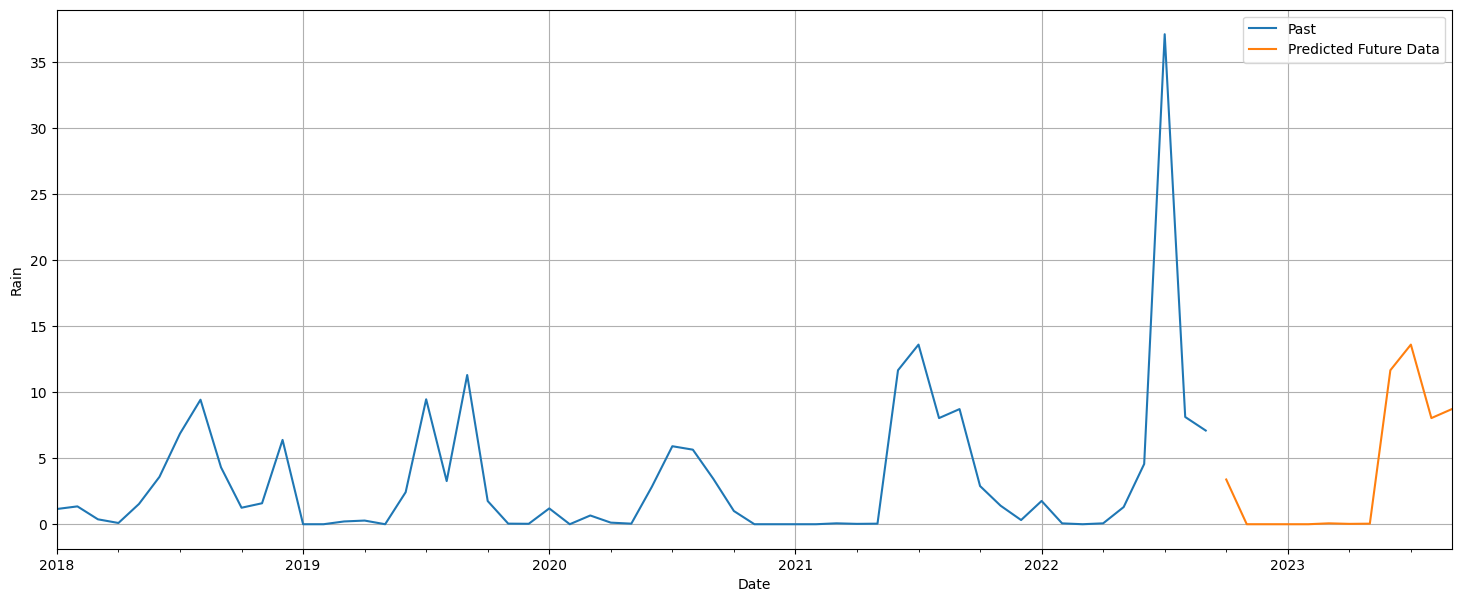

In [31]:
ax=df['rain'].plot(label="Past Data")
Forecast.plot(ax=ax,label="Predicted Future data",figsize=(18,7))
plt.xlabel("Date")
plt.ylabel("Rain")
plt.legend(["Past","Predicted Future Data"])
plt.grid()
plt.show()